# Data Understanding - EDA on cleaned data
## Data Understanding and EDA - Notebook 2
### 

In [203]:
# for data manipulation and analysis

import importlib
import utility_functions
importlib.reload(utility_functions)

import numpy as np
import pandas as pd

# visualisation tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import scipy.stats as stats

# ML libraries
from sklearn.preprocessing import LabelEncoder


In [204]:
df = pd.read_csv('data_clean/clean_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Age                       100000 non-null  float64
 4   Occupation                100000 non-null  object 
 5   Annual_Income             100000 non-null  float64
 6   Monthly_Inhand_Salary     100000 non-null  float64
 7   Num_Bank_Accounts         100000 non-null  float64
 8   Num_Credit_Card           100000 non-null  float64
 9   Interest_Rate             100000 non-null  float64
 10  Num_of_Loan               100000 non-null  float64
 11  Type_of_Loan              100000 non-null  object 
 12  Delay_from_due_date       100000 non-null  float64
 13  Num_of_Delayed_Payment    100000 non-null  fl

#### Deciding which data time screenshots to keep based on the month feature
Because this project is running on a local machine I want to reduce the dataset's dimensions to be able to apply more complex models later. I will keep the most current months (month 8 or 7 & 8) for every customer. I have 12500 distinct customers based on **Customer_ID**.

In [205]:
df

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,24.785217,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,24.785217,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,24.785217,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,24.785217,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,24.785217,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,Good,502.38,29.135447,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,Good,502.38,29.135447,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [206]:
df.query('Month == 8').shape

(12500, 26)

In [207]:
df.query('Month == 8 or Month == 7').shape

(25000, 26)

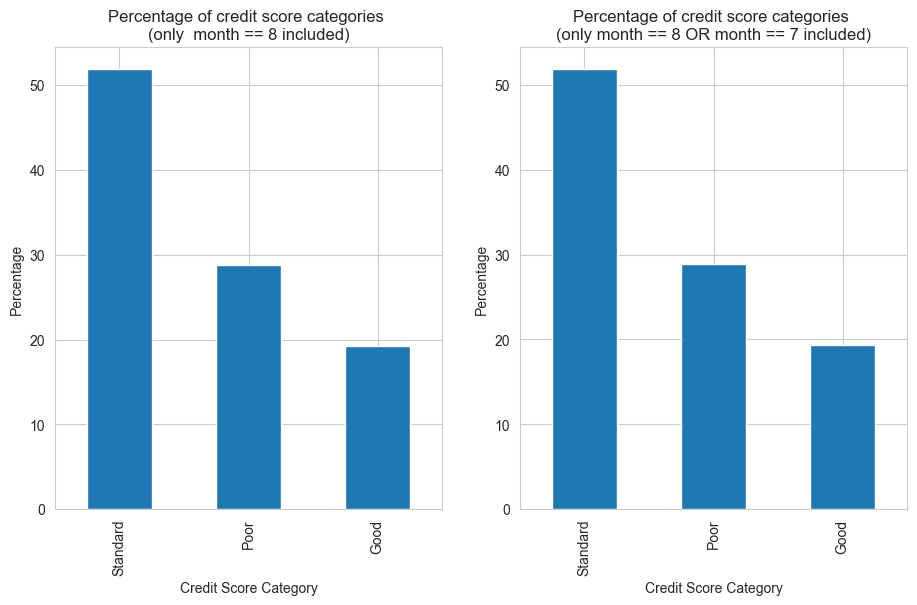

In [208]:
fig, axs = plt.subplots(1,2, figsize=(11,6))
df8 = df.query('Month == 8')
df78= df.query('Month == 8 or Month == 7')


# Plot for 'data' DataFrame
(df8['Credit_Score'].value_counts(normalize = True)*100).plot(kind='bar', ax=axs[0])
axs[0].set_title('Percentage of credit score categories \n(only  month == 8 included)')
axs[0].set_ylabel('Percentage')
axs[0].set_xlabel('Credit Score Category')

# Plot for 'data_reduced' DataFrame
(df78['Credit_Score'].value_counts(normalize = True)*100).plot(kind='bar', ax=axs[1])
axs[1].set_title('Percentage of credit score categories \n(only month == 8 OR month == 7 included)')
axs[1].set_ylabel('Percentage')
axs[1].set_xlabel('Credit Score Category')

#plt.tight_layout()
plt.show()

In [209]:
#printing the counts:
print('Count of credit score categories (only month == 8 included):')
print((df8['Credit_Score'].value_counts(normalize = False)).reset_index())
print('\n\n')
print('Count of credit score categories (only month == 8 OR month == 7 included):')
print((df78['Credit_Score'].value_counts(normalize = False)).reset_index())

Count of credit score categories (only month == 8 included):
  Credit_Score  count
0     Standard   6485
1         Poor   3602
2         Good   2413



Count of credit score categories (only month == 8 OR month == 7 included):
  Credit_Score  count
0     Standard  12960
1         Poor   7216
2         Good   4824


In [210]:
#printing the percentages:
print('Percentage of credit score categories (only for month == 8):')
print((df8['Credit_Score'].value_counts(normalize = True)*100).reset_index())
print('\n\n')
print('Percentage of credit score categories (month == 8 OR month == 7):')
print((df78['Credit_Score'].value_counts(normalize = True)*100).reset_index())

Percentage of credit score categories (only for month == 8):
  Credit_Score  proportion
0     Standard      51.880
1         Poor      28.816
2         Good      19.304



Percentage of credit score categories (month == 8 OR month == 7):
  Credit_Score  proportion
0     Standard      51.840
1         Poor      28.864
2         Good      19.296


What about a different combination? (month == 1 OR 8)

In [211]:
df18 = df.query('Month == 8 or Month == 1')

#printing the counts:
print('Count of credit score categories (only month == 8 included):')
print((df8['Credit_Score'].value_counts(normalize = False)).reset_index())
print('\n\n')
print('Count of credit score categories (only month == 8 OR month == 1 included):')
print((df18['Credit_Score'].value_counts(normalize = False)).reset_index())

print('\n\n------------\n\n')

#printing the percentages:
print('Percentage of credit score categories (only for month == 8):')
print((df8['Credit_Score'].value_counts(normalize = True)*100).reset_index())
print('\n\n')
print('Percentage of credit score categories (month == 8 OR month == 1 included):')
print((df18['Credit_Score'].value_counts(normalize = True)*100).reset_index())

Count of credit score categories (only month == 8 included):
  Credit_Score  count
0     Standard   6485
1         Poor   3602
2         Good   2413



Count of credit score categories (only month == 8 OR month == 1 included):
  Credit_Score  count
0     Standard  13428
1         Poor   7184
2         Good   4388


------------


Percentage of credit score categories (only for month == 8):
  Credit_Score  proportion
0     Standard      51.880
1         Poor      28.816
2         Good      19.304



Percentage of credit score categories (month == 8 OR month == 1 included):
  Credit_Score  proportion
0     Standard      53.712
1         Poor      28.736
2         Good      17.552


**I decided to  keep the subset with most current month (month == 8) per Customer_ID. There are no big differences on the count of classes of the target variable between the above subsets**.

Note: Normally I should check all the numerical feature's distributions, categorical features' classes counts and percentages of the above subsets. For reasons of simplicity, I make the assumption that there are no significant changes of features' characteristics when choosing my final subset.

**Assigning subset to df Dataframe**:

In [212]:
data = df.query('Month == 8')
data.shape

(12500, 26)

Which features should I drop first, as they will be no useful in modelling phase?

In [213]:
df.columns.values

array(['ID', 'Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly',
       'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score'],
      dtype=object)

Features **Month** and **ID** are obsolete and will be dropped:

In [214]:
# dropping features and resetting indexL
data = data.drop(['ID','Month'], axis = 1, inplace = False).reset_index().drop(['index'], axis = 1, inplace = False)
data.shape

(12500, 24)

In [215]:
data.info()
#pd.DataFrame(data.columns.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               12500 non-null  int64  
 1   Age                       12500 non-null  float64
 2   Occupation                12500 non-null  object 
 3   Annual_Income             12500 non-null  float64
 4   Monthly_Inhand_Salary     12500 non-null  float64
 5   Num_Bank_Accounts         12500 non-null  float64
 6   Num_Credit_Card           12500 non-null  float64
 7   Interest_Rate             12500 non-null  float64
 8   Num_of_Loan               12500 non-null  float64
 9   Type_of_Loan              12500 non-null  object 
 10  Delay_from_due_date       12500 non-null  float64
 11  Num_of_Delayed_Payment    12500 non-null  float64
 12  Changed_Credit_Limit      12500 non-null  float64
 13  Num_Credit_Inquiries      12500 non-null  float64
 14  Credit

#### Based on expert's opinion:
In Credit Scoring the most used features in current industry models are:
- Annual_Income
- Monthly_Inhand_Salary
- Outstanding_Debt
- Payment_Behaviour
- Delay_from_due_date
- Num_of_Delayed_Payment
- Credit_Utilization_Ratio

In other words I will analyse the above features first and if I deem it necessary then I will add more variables.

In [240]:
# just viewing my table
data[['Customer_ID','Annual_Income','Monthly_Inhand_Salary','Outstanding_Debt','Payment_Behaviour','Delay_from_due_date','Num_of_Delayed_Payment','Credit_Utilization_Ratio','Credit_Score']]

,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Outstanding_Debt,Payment_Behaviour,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Utilization_Ratio,Credit_Score
0,3392,19114.12,1824.843333,809.98,High_spent_Medium_value_payments,3.0,6.0,23.933795,Standard
1,8625,34847.84,3037.986667,605.03,Low_spent_Small_value_payments,3.0,4.0,32.933856,Good
2,11708,143162.64,12187.220000,1303.01,High_spent_Small_value_payments,8.0,6.0,26.519815,Standard
3,47249,30689.89,2612.490833,632.46,High_spent_Small_value_payments,4.0,9.0,27.332515,Standard
4,7387,35547.71,2853.309167,943.86,High_spent_Small_value_payments,1.0,15.0,25.862922,Standard
...,...,...,...,...,...,...,...,...,...
12495,14124,42903.79,3468.315833,1079.48,High_spent_Medium_value_payments,9.0,0.0,35.716618,Good
12496,3862,16680.35,1528.029167,897.16,Low_spent_Large_value_payments,1.0,0.0,24.972853,Good
12497,44897,37188.10,3097.008333,620.64,High_spent_Medium_value_payments,7.0,9.0,24.540510,Good
12498,34304,20002.88,1929.906667,3571.70,High_spent_Large_value_payments,33.0,25.0,37.140784,Standard


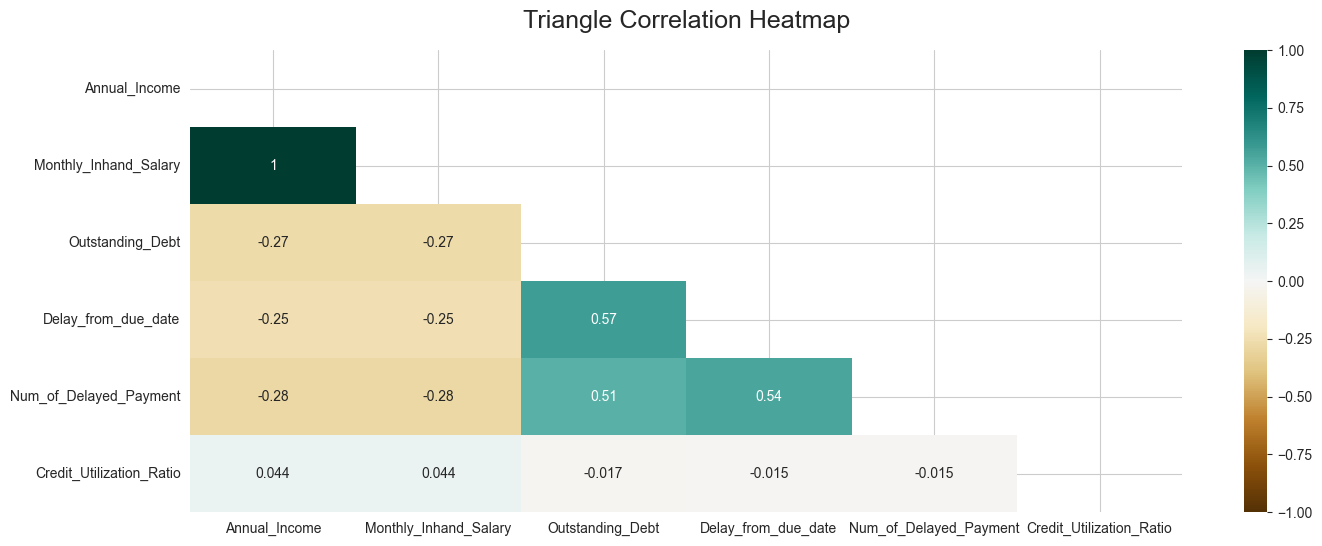

In [238]:
from utility_functions import plot_triangular_heatmap
temp = data[['Annual_Income',
             'Monthly_Inhand_Salary',
             'Outstanding_Debt',
             'Delay_from_due_date',
             'Num_of_Delayed_Payment',
             'Credit_Utilization_Ratio']]

plot_triangular_heatmap(temp)


In [239]:
#'Customer_ID', 'Payment_Behaviour', 'Credit_Score'
print(data['Payment_Behaviour'].unique())

array(['High_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [226]:
from utility_functions import correlation_with_target

correlation_value = correlation_with_target(data, 'Annual_Income')
print(f"Correlation between Annual_Income and Credit Score: {correlation_value}")

Correlation between Annual_Income and Credit Score: -0.03505689549177393
